# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [123]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [124]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [125]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [126]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

df = pd.read_parquet("C:\\Users\\SATABDI\\Downloads\\EDA_NYC_Taxi_Records\\Datasets and Dictionary\\trip_records\\2023-1.parquet")
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [127]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [128]:
# from google.colab import drive
# drive.mount('/content/drive')

In [129]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
# os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')
os.chdir("C:\\Users\\SATABDI\\Downloads\\EDA_NYC_Taxi_Records\\Datasets and Dictionary\\trip_records\\")

# Create a list of all the twelve files to read
# file_list = os.listdir()  // Stored sampled data (sampled_nyc_taxi_data.csv) in same folder, so getting issue while re-running the code :-), so check the file extention and then read the file
file_list = [file for file in os.listdir() if file.endswith(".parquet")]

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        file_path = os.path.join(os.getcwd(), file_name)
        print(f'Processing file: {file_path}')

        # Reading the current file
        df_month = pd.read_parquet(file_path)
        print('Original shape:', df_month.shape)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        df_month['date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['hour'] = df_month['tpep_pickup_datetime'].dt.hour

        # Get unique dates in the current month file
        unique_dates = df_month['date'].unique()

        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in unique_dates:
            df_date = df_month[df_month['date'] == date]

             # Initialize a DataFrame to store sampled data for this date
            sampled_date_data = pd.DataFrame()

            # Iterate through each hour of the selected date
            for hour in range(24):
                df_hour = df_date[df_date['hour'] == hour]

                # Sample 5% of the hourly data randomly
                sample = df_hour.sample(frac=0.0082, random_state=42) if not df_hour.empty else pd.DataFrame()  # sampling with 0.82% of the data (random selection); 25000 / 3041714 = 0.00822 (12 no of files = 300000 lakhs records)
                
                # add data of this hour to the dataframe
                sampled_date_data = pd.concat([sampled_date_data, sample])

            # Append sampled date data to monthly data
            sampled_data = pd.concat([sampled_data, sampled_date_data])    

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data]) # we initialised this empty DF earlier
        
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processing file: C:\Users\SATABDI\Downloads\EDA_NYC_Taxi_Records\Datasets and Dictionary\trip_records\2023-1.parquet
Original shape: (3041714, 19)
Processing file: C:\Users\SATABDI\Downloads\EDA_NYC_Taxi_Records\Datasets and Dictionary\trip_records\2023-10.parquet
Original shape: (3485185, 19)
Processing file: C:\Users\SATABDI\Downloads\EDA_NYC_Taxi_Records\Datasets and Dictionary\trip_records\2023-11.parquet
Original shape: (3302857, 19)
Processing file: C:\Users\SATABDI\Downloads\EDA_NYC_Taxi_Records\Datasets and Dictionary\trip_records\2023-12.parquet
Original shape: (3333925, 19)
Processing file: C:\Users\SATABDI\Downloads\EDA_NYC_Taxi_Records\Datasets and Dictionary\trip_records\2023-2.parquet
Original shape: (3374086, 19)
Processing file: C:\Users\SATABDI\Downloads\EDA_NYC_Taxi_Records\Datasets and Dictionary\trip_records\2023-3.parquet
Original shape: (3275796, 19)
Processing file: C:\Users\SATABDI\Downloads\EDA_NYC_Taxi_Records\Datasets and Dictionary\trip_records\2023-4.parque

In [130]:
df.shape

(311004, 22)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311004 entries, 428 to 2846347
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               311004 non-null  int64         
 1   tpep_pickup_datetime   311004 non-null  datetime64[us]
 2   tpep_dropoff_datetime  311004 non-null  datetime64[us]
 3   passenger_count        300576 non-null  float64       
 4   trip_distance          311004 non-null  float64       
 5   RatecodeID             300576 non-null  float64       
 6   store_and_fwd_flag     300576 non-null  object        
 7   PULocationID           311004 non-null  int64         
 8   DOLocationID           311004 non-null  int64         
 9   payment_type           311004 non-null  int64         
 10  fare_amount            311004 non-null  float64       
 11  extra                  311004 non-null  float64       
 12  mta_tax                311004 non-null  float6

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [132]:
# Store the df in csv/parquet
# df.to_parquet('')

df.to_csv("C:\\Users\\SATABDI\\Downloads\\EDA_NYC_Taxi_Records\\Datasets and Dictionary\\trip_records\\sampled_nyc_taxi_data.csv", index=False)


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [133]:
# Load the new data file
df = pd.read_csv("C:\\Users\\SATABDI\\Downloads\\EDA_NYC_Taxi_Records\\Datasets and Dictionary\\trip_records\\sampled_nyc_taxi_data.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311004 entries, 0 to 311003
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               311004 non-null  int64  
 1   tpep_pickup_datetime   311004 non-null  object 
 2   tpep_dropoff_datetime  311004 non-null  object 
 3   passenger_count        300576 non-null  float64
 4   trip_distance          311004 non-null  float64
 5   RatecodeID             300576 non-null  float64
 6   store_and_fwd_flag     300576 non-null  object 
 7   PULocationID           311004 non-null  int64  
 8   DOLocationID           311004 non-null  int64  
 9   payment_type           311004 non-null  int64  
 10  fare_amount            311004 non-null  float64
 11  extra                  311004 non-null  float64
 12  mta_tax                311004 non-null  float64
 13  tip_amount             311004 non-null  float64
 14  tolls_amount           311004 non-nu

In [134]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [135]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311004 entries, 0 to 311003
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               311004 non-null  int64  
 1   tpep_pickup_datetime   311004 non-null  object 
 2   tpep_dropoff_datetime  311004 non-null  object 
 3   passenger_count        300576 non-null  float64
 4   trip_distance          311004 non-null  float64
 5   RatecodeID             300576 non-null  float64
 6   store_and_fwd_flag     300576 non-null  object 
 7   PULocationID           311004 non-null  int64  
 8   DOLocationID           311004 non-null  int64  
 9   payment_type           311004 non-null  int64  
 10  fare_amount            311004 non-null  float64
 11  extra                  311004 non-null  float64
 12  mta_tax                311004 non-null  float64
 13  tip_amount             311004 non-null  float64
 14  tolls_amount           311004 non-nu

In [136]:
df.shape

(311004, 22)

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [137]:
# Fix the index and drop any columns that are not needed
df.drop(columns=['date'],inplace= True)
df.drop(columns=['hour'],inplace= True)

In [138]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee'],
      dtype='object')

In [139]:
# Test code:

lower_cols = {col.lower(): col for col in df.columns}
print(lower_cols)

# Identify duplicate columns (case-insensitive)
dup_cols = [col for col in df.columns if col.lower() == 'airport_fee']

print(dup_cols)


{'vendorid': 'VendorID', 'tpep_pickup_datetime': 'tpep_pickup_datetime', 'tpep_dropoff_datetime': 'tpep_dropoff_datetime', 'passenger_count': 'passenger_count', 'trip_distance': 'trip_distance', 'ratecodeid': 'RatecodeID', 'store_and_fwd_flag': 'store_and_fwd_flag', 'pulocationid': 'PULocationID', 'dolocationid': 'DOLocationID', 'payment_type': 'payment_type', 'fare_amount': 'fare_amount', 'extra': 'extra', 'mta_tax': 'mta_tax', 'tip_amount': 'tip_amount', 'tolls_amount': 'tolls_amount', 'improvement_surcharge': 'improvement_surcharge', 'total_amount': 'total_amount', 'congestion_surcharge': 'congestion_surcharge', 'airport_fee': 'Airport_fee'}
['airport_fee', 'Airport_fee']


In [140]:
if len(dup_cols) > 1:
    df['Airport_fee'] = df[dup_cols].sum(axis=1)
    df.drop(columns=[col for col in dup_cols if col != 'Airport_fee'], inplace=True)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311004 entries, 0 to 311003
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               311004 non-null  int64  
 1   tpep_pickup_datetime   311004 non-null  object 
 2   tpep_dropoff_datetime  311004 non-null  object 
 3   passenger_count        300576 non-null  float64
 4   trip_distance          311004 non-null  float64
 5   RatecodeID             300576 non-null  float64
 6   store_and_fwd_flag     300576 non-null  object 
 7   PULocationID           311004 non-null  int64  
 8   DOLocationID           311004 non-null  int64  
 9   payment_type           311004 non-null  int64  
 10  fare_amount            311004 non-null  float64
 11  extra                  311004 non-null  float64
 12  mta_tax                311004 non-null  float64
 13  tip_amount             311004 non-null  float64
 14  tolls_amount           311004 non-nu

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [142]:
# Combine the two airport fee columns
lower_cols = {col.lower(): col for col in df.columns}
print(lower_cols)

# Identify duplicate columns (case-insensitive)
dup_cols = [col for col in df.columns if col.lower() == 'airport_fee']

print(dup_cols)

if len(dup_cols) > 1:
    df['Airport_fee'] = df[dup_cols].sum(axis=1)
    df.drop(columns=[col for col in dup_cols if col != 'Airport_fee'], inplace=True)


{'vendorid': 'VendorID', 'tpep_pickup_datetime': 'tpep_pickup_datetime', 'tpep_dropoff_datetime': 'tpep_dropoff_datetime', 'passenger_count': 'passenger_count', 'trip_distance': 'trip_distance', 'ratecodeid': 'RatecodeID', 'store_and_fwd_flag': 'store_and_fwd_flag', 'pulocationid': 'PULocationID', 'dolocationid': 'DOLocationID', 'payment_type': 'payment_type', 'fare_amount': 'fare_amount', 'extra': 'extra', 'mta_tax': 'mta_tax', 'tip_amount': 'tip_amount', 'tolls_amount': 'tolls_amount', 'improvement_surcharge': 'improvement_surcharge', 'total_amount': 'total_amount', 'congestion_surcharge': 'congestion_surcharge', 'airport_fee': 'Airport_fee'}
['Airport_fee']


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311004 entries, 0 to 311003
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               311004 non-null  int64  
 1   tpep_pickup_datetime   311004 non-null  object 
 2   tpep_dropoff_datetime  311004 non-null  object 
 3   passenger_count        300576 non-null  float64
 4   trip_distance          311004 non-null  float64
 5   RatecodeID             300576 non-null  float64
 6   store_and_fwd_flag     300576 non-null  object 
 7   PULocationID           311004 non-null  int64  
 8   DOLocationID           311004 non-null  int64  
 9   payment_type           311004 non-null  int64  
 10  fare_amount            311004 non-null  float64
 11  extra                  311004 non-null  float64
 12  mta_tax                311004 non-null  float64
 13  tip_amount             311004 non-null  float64
 14  tolls_amount           311004 non-nu

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [144]:
# check where values of fare amount are negative
negative_fare_df = df[df['fare_amount'] < 0]
print("Negative Fare Amount", negative_fare_df)
 

Negative Fare Amount Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []


In [145]:
negative_fare_count = df[df['fare_amount'] < 0].shape[0]
print(f"Number of rows with negative fare_amount: {negative_fare_count}")


Number of rows with negative fare_amount: 0


Did you notice something different in the `RatecodeID` column for above records?

In [146]:
# Analyse RatecodeID for the negative fare amounts

negative_fare_df = df[df['fare_amount'] < 0]

print(negative_fare_df[['RatecodeID', 'fare_amount']])
print("count:", negative_fare_df['RatecodeID'].value_counts())

ratecode_stats = negative_fare_df.groupby('RatecodeID')['fare_amount'].agg(['count', 'mean', 'min', 'max'])
print(ratecode_stats)


Empty DataFrame
Columns: [RatecodeID, fare_amount]
Index: []
count: Series([], Name: count, dtype: int64)
Empty DataFrame
Columns: [count, mean, min, max]
Index: []


In [147]:
# Find which columns have negative values

numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.columns)

# Find columns with negative values
# negative_columns = df.loc[:, (df < 0).any()].columns  # few columns type is other than numeric, <- gaurd check ->

negative_columns = numeric_df.loc[:, (numeric_df < 0).any()].columns
print("Columns with negative values:", list(negative_columns))


Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')
Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [148]:
print((df[negative_columns]<0).sum())

extra                     1
mta_tax                  11
improvement_surcharge    11
total_amount             11
congestion_surcharge      6
Airport_fee               2
dtype: int64


In [149]:
# fix these negative values

df[negative_columns] = df[negative_columns].clip(lower=0)

In [150]:
print((df[negative_columns]<0).sum())

extra                    0
mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [151]:
# Find the proportion of missing values in each column

missing_proportion = df.isnull().mean()
print(missing_proportion)


VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          0.03353
trip_distance            0.00000
RatecodeID               0.03353
store_and_fwd_flag       0.03353
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     0.03353
Airport_fee              0.00000
dtype: float64


In [152]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          10428
trip_distance                0
RatecodeID               10428
store_and_fwd_flag       10428
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     10428
Airport_fee                  0
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [153]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df.isnull().sum()

df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

# Verify if missing values are filled
print("\nMissing Values After Imputation:\n", df.isnull().sum())



Missing Values After Imputation:
 VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID               10428
store_and_fwd_flag       10428
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     10428
Airport_fee                  0
dtype: int64


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [154]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)

# Display missing values after imputation
print("\nMissing Values After:\n", df.isnull().sum())


Missing Values After:
 VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       10428
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     10428
Airport_fee                  0
dtype: int64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [155]:
# handle null values in congestion_surcharge

df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0], inplace=True)

# Display missing values after imputation
print("\nMissing Values After:\n", df.isnull().sum())



Missing Values After:
 VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       10428
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
Airport_fee                  0
dtype: int64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [156]:
# Handle any remaining missing values


df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)

# Display missing values after imputation
print("\nMissing Values After:\n", df.isnull().sum())



Missing Values After:
 VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311004 entries, 0 to 311003
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               311004 non-null  int64  
 1   tpep_pickup_datetime   311004 non-null  object 
 2   tpep_dropoff_datetime  311004 non-null  object 
 3   passenger_count        311004 non-null  float64
 4   trip_distance          311004 non-null  float64
 5   RatecodeID             311004 non-null  float64
 6   store_and_fwd_flag     311004 non-null  object 
 7   PULocationID           311004 non-null  int64  
 8   DOLocationID           311004 non-null  int64  
 9   payment_type           311004 non-null  int64  
 10  fare_amount            311004 non-null  float64
 11  extra                  311004 non-null  float64
 12  mta_tax                311004 non-null  float64
 13  tip_amount             311004 non-null  float64
 14  tolls_amount           311004 non-nu

In [158]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [159]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

def compute_outlier_of_each_column(df):
    outlier_dict = {}  # Store outlier counts for each column
    
    numeric_columns = df.select_dtypes(include=['number']).columns  # Select only numeric columns
    print("Numeric Columns:", numeric_columns)

    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)  # 25th percentile
        Q3 = df[column].quantile(0.75)  # 75th percentile

        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[
                    (df[column] < lower_bound)  | 
                    (df[column] > upper_bound)
                ]
        
        if not outliers.empty:
            outlier_dict[column] = outliers  # Store outlier data

            print(f"\n Outliers detected in '{column}':")
            print(outliers[[column]].describe())  # Show stats of outliers
            
    return outlier_dict  # Return dictionary of outliers detected in each column


# call the function
outliers_dict = compute_outlier_of_each_column(df)

print("Number of potential outliers in each column:\n",outliers_dict)


Numeric Columns: Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

 Outliers detected in 'VendorID':
       VendorID
count      77.0
mean        6.0
std         0.0
min         6.0
25%         6.0
50%         6.0
75%         6.0
max         6.0

 Outliers detected in 'passenger_count':
       passenger_count
count     73983.000000
mean          2.490991
std           1.243869
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           9.000000

 Outliers detected in 'trip_distance':
       trip_distance
count   40574.000000
mean       14.373186
std       123.806218
min         6.930000
25%         9.200000
50%        11.735000
75%        17.600000
max     22528.820000

 Outliers detected 

In [160]:
print(df['passenger_count'].value_counts())

passenger_count
1.0    237021
2.0     45220
3.0     11261
4.0      6229
0.0      4771
5.0      3869
6.0      2628
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [161]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]


In [162]:
# Test:
print(df['passenger_count'].value_counts())

passenger_count
1.0    237021
2.0     45220
3.0     11261
4.0      6229
0.0      4771
5.0      3869
6.0      2628
Name: count, dtype: int64


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310999 entries, 0 to 311003
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               310999 non-null  int64  
 1   tpep_pickup_datetime   310999 non-null  object 
 2   tpep_dropoff_datetime  310999 non-null  object 
 3   passenger_count        310999 non-null  float64
 4   trip_distance          310999 non-null  float64
 5   RatecodeID             310999 non-null  float64
 6   store_and_fwd_flag     310999 non-null  object 
 7   PULocationID           310999 non-null  int64  
 8   DOLocationID           310999 non-null  int64  
 9   payment_type           310999 non-null  int64  
 10  fare_amount            310999 non-null  float64
 11  extra                  310999 non-null  float64
 12  mta_tax                310999 non-null  float64
 13  tip_amount             310999 non-null  float64
 14  tolls_amount           310999 non-null  f

In [164]:
df.shape

(310999, 19)

In [165]:
# Continue with outlier handling

# Outlier-1: Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df.shape


(310993, 19)

In [166]:
# Outlier-2:  Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
# df = df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])]
# df.shape  # (123, 19),  remove almost data, so ignoring this outlier 


In [167]:
# df1 = df[df['trip_distance'] > 250] 
# df1.shape # (3, 19) remove almost data, so ignoring this outlier

In [168]:
# Outlie-3: Entries where `trip_distance` is more than 250 miles.
# df = df[df['trip_distance'] > 250]
df.shape  # (0, 19)


(310993, 19)

In [169]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         1.0                  N            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         41.15                   0.0         1.25  
1                    1.0         15.48                   2.5         0.00  
2                    1.0         16.40                   2.5         0.00  
3                    1.0         11.50                   2.5         0.00  
4                    1.0         35.57                   2.5         0.00

In [170]:
# check the payment_type column
df['payment_type'].value_counts()


payment_type
1    244829
2     52056
0     10428
4      2253
3      1427
Name: count, dtype: int64

In [171]:
# find most common payment type and print it
most_common_payment_type = df['payment_type'].mode()[0]
print("Most Common Payment Type:", most_common_payment_type)   

Most Common Payment Type: 1


In [172]:
# Do any columns need standardising?
# Standardize the columns of paymet_type
df['payment_type'] = df['payment_type'].apply(lambda x: most_common_payment_type if x == 0 else x)

# Verify if the payment_type column is standardized
print("\nPayment Type After Standardization:\n", df['payment_type'].value_counts())



Payment Type After Standardization:
 payment_type
1    255257
2     52056
4      2253
3      1427
Name: count, dtype: int64


In [173]:
# Any standardisation needed for RatecodeID? (Not Required)
# Standardize the columns of RatecodeID
most_common_RatecodeID = df['RatecodeID'].mode()[0]
print("Most Common RatecodeID:", most_common_RatecodeID)

Most Common RatecodeID: 1.0


In [174]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     294213
2.0      11744
99.0      1774
5.0       1689
3.0        984
4.0        589
Name: count, dtype: int64

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310993 entries, 0 to 311003
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               310993 non-null  int64  
 1   tpep_pickup_datetime   310993 non-null  object 
 2   tpep_dropoff_datetime  310993 non-null  object 
 3   passenger_count        310993 non-null  float64
 4   trip_distance          310993 non-null  float64
 5   RatecodeID             310993 non-null  float64
 6   store_and_fwd_flag     310993 non-null  object 
 7   PULocationID           310993 non-null  int64  
 8   DOLocationID           310993 non-null  int64  
 9   payment_type           310993 non-null  int64  
 10  fare_amount            310993 non-null  float64
 11  extra                  310993 non-null  float64
 12  mta_tax                310993 non-null  float64
 13  tip_amount             310993 non-null  float64
 14  tolls_amount           310993 non-null  f

In [176]:
# Converting the data types of the columns (tpep_pickup_datetime, tpep_dropoff_datetime) to datetime

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310993 entries, 0 to 311003
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               310993 non-null  int64         
 1   tpep_pickup_datetime   310993 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  310993 non-null  datetime64[ns]
 3   passenger_count        310993 non-null  float64       
 4   trip_distance          310993 non-null  float64       
 5   RatecodeID             310993 non-null  float64       
 6   store_and_fwd_flag     310993 non-null  object        
 7   PULocationID           310993 non-null  int64         
 8   DOLocationID           310993 non-null  int64         
 9   payment_type           310993 non-null  int64         
 10  fare_amount            310993 non-null  float64       
 11  extra                  310993 non-null  float64       
 12  mta_tax                310993 non-null  float64  

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [178]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [179]:
# Answer:
    # 1. Categorical
    # 2. Numerical

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310993 entries, 0 to 311003
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               310993 non-null  int64         
 1   tpep_pickup_datetime   310993 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  310993 non-null  datetime64[ns]
 3   passenger_count        310993 non-null  float64       
 4   trip_distance          310993 non-null  float64       
 5   RatecodeID             310993 non-null  float64       
 6   store_and_fwd_flag     310993 non-null  object        
 7   PULocationID           310993 non-null  int64         
 8   DOLocationID           310993 non-null  int64         
 9   payment_type           310993 non-null  int64         
 10  fare_amount            310993 non-null  float64       
 11  extra                  310993 non-null  float64       
 12  mta_tax                310993 non-null  float64  

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

pickup_hour
0      8810
1      5907
2      3905
3      2577
4      1726
5      1826
6      4324
7      8501
8     11769
9     13285
10    14415
11    15648
12    16984
13    17513
14    18772
15    19253
16    19269
17    20981
18    21964
19    19633
20    17476
21    17459
22    16179
23    12817
dtype: int64


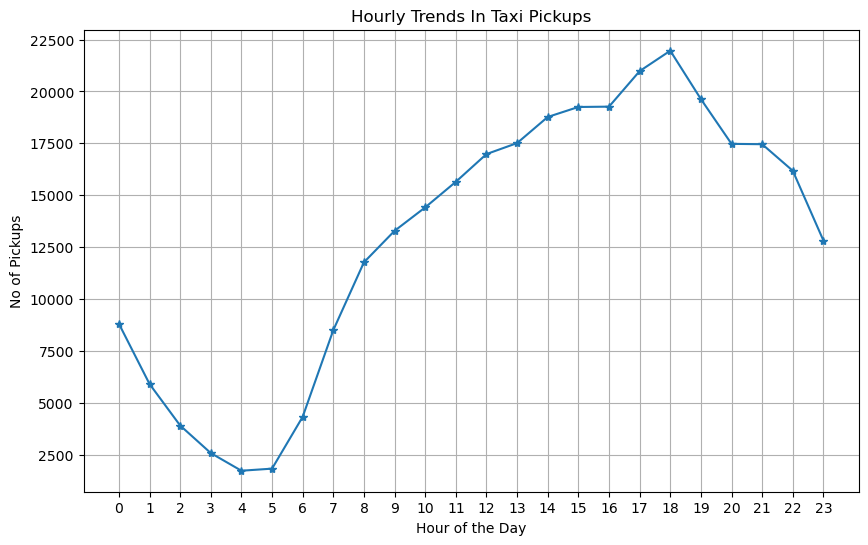

In [181]:
# Find and show the hourly trends in taxi pickups

# Extract the hour from the pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group the data by the extracted hour
hourly_pickups = df.groupby('pickup_hour').size()
print(hourly_pickups)

# Plot the graph
plt.figure(figsize=(10, 6))
hourly_pickups.plot(kind='line', marker='*')
plt.title('Hourly Trends In Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('No of Pickups')
plt.xticks(range(24))
plt.grid(True)
plt.show()




In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310993 entries, 0 to 311003
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               310993 non-null  int64         
 1   tpep_pickup_datetime   310993 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  310993 non-null  datetime64[ns]
 3   passenger_count        310993 non-null  float64       
 4   trip_distance          310993 non-null  float64       
 5   RatecodeID             310993 non-null  float64       
 6   store_and_fwd_flag     310993 non-null  object        
 7   PULocationID           310993 non-null  int64         
 8   DOLocationID           310993 non-null  int64         
 9   payment_type           310993 non-null  int64         
 10  fare_amount            310993 non-null  float64       
 11  extra                  310993 non-null  float64       
 12  mta_tax                310993 non-null  float64  

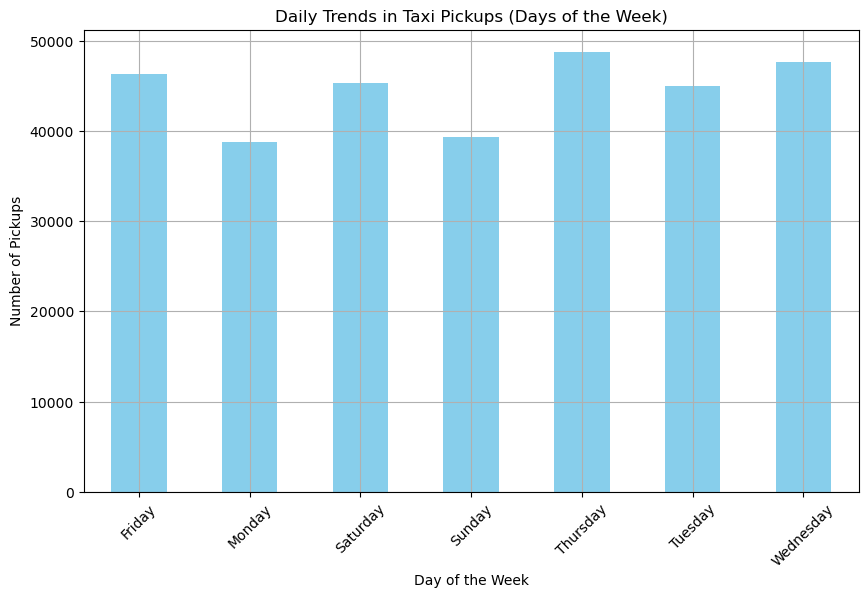

In [183]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
daily_pickups = df['pickup_day_of_week'].value_counts().sort_index()

# Plot the graph
plt.figure(figsize=(10, 6))
daily_pickups.plot(kind='bar', color='skyblue')
plt.title('Daily Trends in Taxi Pickups (Days of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


For ordering re-index is required... 

daily_pickups = df['pickup_day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

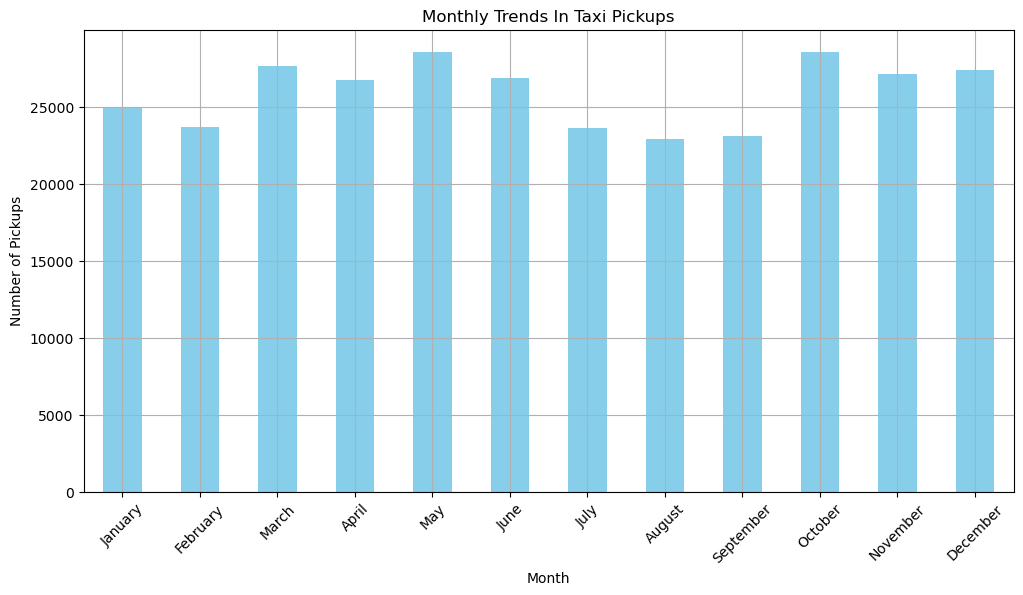

In [184]:
# Show the monthly trends in pickups

df['pickup_month_name'] = df['tpep_pickup_datetime'].dt.month_name()

monthly_trends = df['pickup_month_name'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], fill_value=0)

# Plot the graph
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='bar', color='skyblue')
plt.title('Monthly Trends In Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [185]:
# Analyse the above parameters

financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_columns:
    zero_values = (df[col] == 0).sum()
    negative_values = (df[col] < 0).sum()
    print(f"{col}: {zero_values} zero values, {negative_values} negative values")


fare_amount: 111 zero values, 0 negative values
tip_amount: 71439 zero values, 0 negative values
total_amount: 55 zero values, 0 negative values
trip_distance: 6137 zero values, 0 negative values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [186]:
# Create a df with non zero entries for the selected parameters.

# trip_distance> ignore this value
non_zero_df = df[
    (df['trip_distance'] > 0) &
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0)
].copy()

non_zero_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304795 entries, 0 to 311002
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               304795 non-null  int64         
 1   tpep_pickup_datetime   304795 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  304795 non-null  datetime64[ns]
 3   passenger_count        304795 non-null  float64       
 4   trip_distance          304795 non-null  float64       
 5   RatecodeID             304795 non-null  float64       
 6   store_and_fwd_flag     304795 non-null  object        
 7   PULocationID           304795 non-null  int64         
 8   DOLocationID           304795 non-null  int64         
 9   payment_type           304795 non-null  int64         
 10  fare_amount            304795 non-null  float64       
 11  extra                  304795 non-null  float64       
 12  mta_tax                304795 non-null  float64  

In [187]:
print("Number of entries with non-zero values for the selected parameters:")
print(non_zero_df.shape[0])

Number of entries with non-zero values for the selected parameters:
304795


In [188]:
non_zero_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         1.0                  N            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             1  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   2.5         0.00   

   pickup_hour  pickup_day_of_week  pickup_month_name  
0            0              Sunday            January  
1            0              Sunday            January  
2            0              Sunday            January  
3            0              Sunday            January  
4            0              Sunday            January  

[5 rows x 22 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

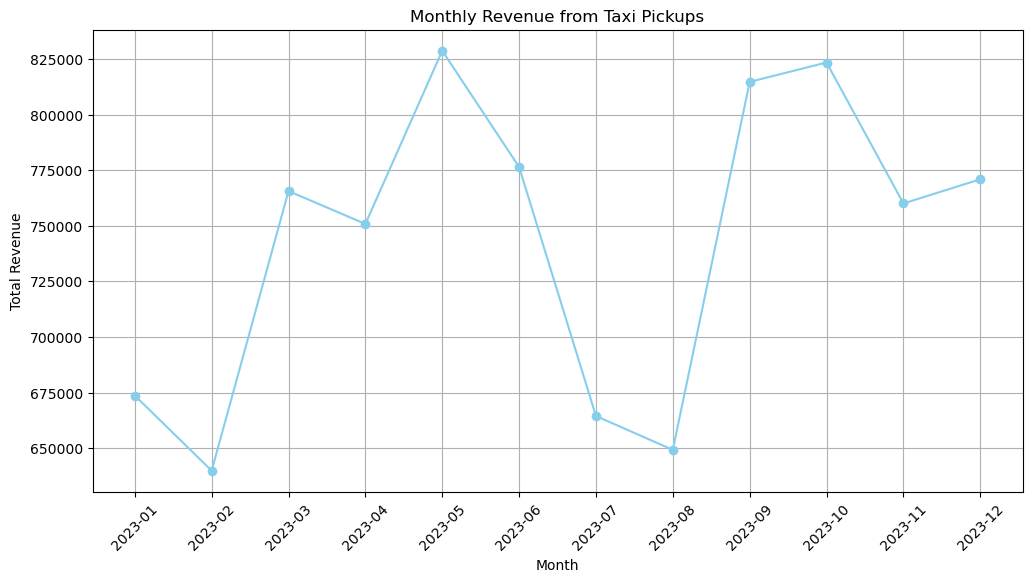

In [189]:
# Group data by month and analyse monthly revenue

non_zero_df['pickup_month'] = non_zero_df['tpep_pickup_datetime'].dt.to_period('M')

monthly_revenue = non_zero_df.groupby('pickup_month')['total_amount'].sum().reset_index()
monthly_revenue = monthly_revenue.sort_values(by='pickup_month')

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['pickup_month'].astype(str), monthly_revenue['total_amount'], marker='o', color='skyblue')
plt.title('Monthly Revenue from Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Quarterly Revenue and Proportions:
  pickup_quarter  total_amount  proportion
0         2023Q1    2079080.20    0.233143
1         2023Q2    2355899.04    0.264185
2         2023Q3    2128350.29    0.238668
3         2023Q4    2354293.39    0.264005


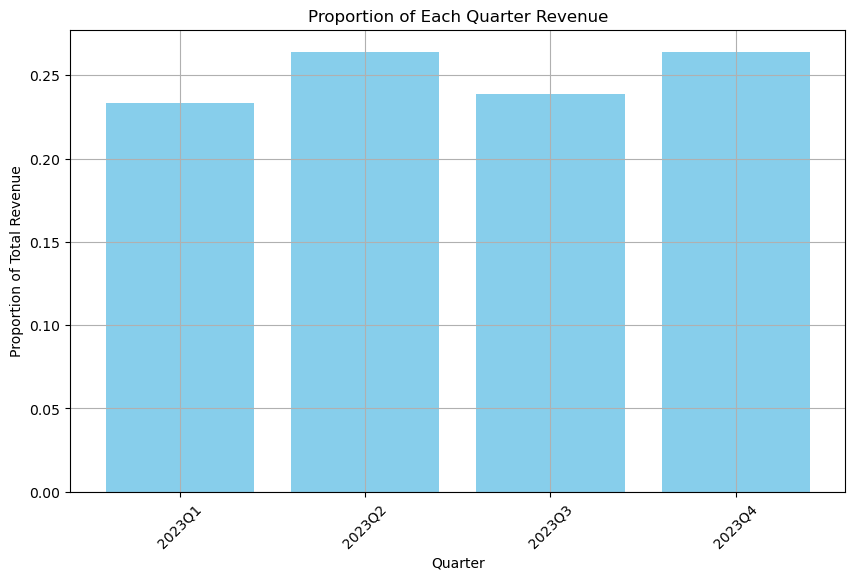

In [190]:
# Calculate proportion of each quarter

non_zero_df['pickup_quarter'] = non_zero_df['tpep_pickup_datetime'].dt.to_period('Q')

quarterly_revenue = non_zero_df.groupby('pickup_quarter')['total_amount'].sum().reset_index()

total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue

print("Quarterly Revenue and Proportions:")
print(quarterly_revenue)

# Plot the graph(proportion vs. each quarter revenue)
plt.figure(figsize=(10, 6))
plt.bar(quarterly_revenue['pickup_quarter'].astype(str), quarterly_revenue['proportion'], color='skyblue')
plt.title("Proportion of Each Quarter Revenue")
plt.xlabel('Quarter')
plt.ylabel('Proportion of Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



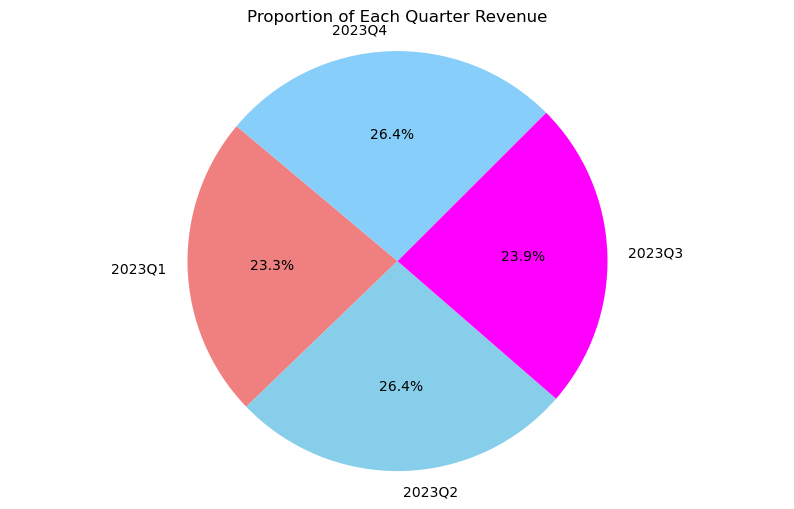

In [191]:

plt.figure(figsize=(10, 6))
plt.pie(quarterly_revenue['proportion'], labels=quarterly_revenue['pickup_quarter'].astype(str), autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue', 'magenta', 'lightskyblue'])
plt.title("Proportion of Each Quarter Revenue")
plt.axis('equal')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

(304795, 24)


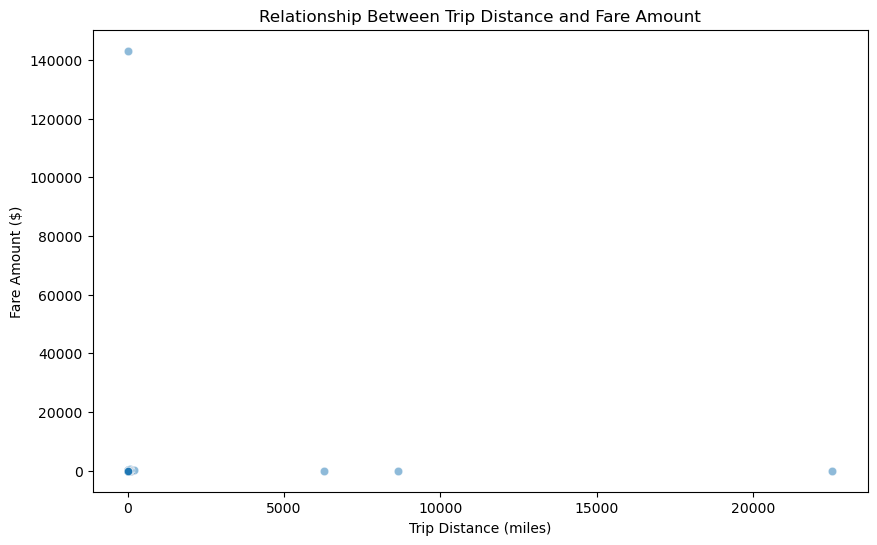

Correlation between Trip Distance and Fare Amount: 0.01


In [192]:
# Show how trip fare is affected by distance
print(non_zero_df.shape)

# Show how trip fare is affected by distance
non_zero_df = non_zero_df[non_zero_df['trip_distance'] > 0]

# Scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_zero_df, x='trip_distance', y='fare_amount', alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.show()

correlation = non_zero_df['trip_distance'].corr(non_zero_df['fare_amount'])
print(f"Correlation between Trip Distance and Fare Amount: {correlation:.2f}")




**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

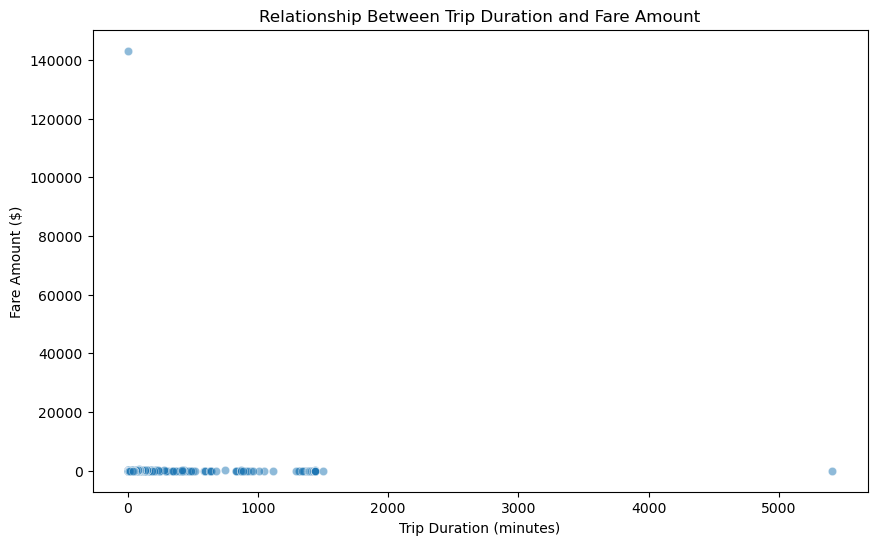

Correlation between Trip Duration and Fare Amount: 0.02


In [193]:
# Show relationship between fare and trip duration

non_zero_df["trip_duration"] = (non_zero_df["tpep_dropoff_datetime"] - non_zero_df["tpep_pickup_datetime"]).dt.total_seconds() / 60

# Remove trips with zero or negative duration
df_filtered = non_zero_df[non_zero_df["trip_duration"] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x="trip_duration", y="fare_amount", alpha=0.5)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Duration and Fare Amount")
plt.show()

correlation = df_filtered["trip_duration"].corr(df_filtered["fare_amount"])

print(f"Correlation between Trip Duration and Fare Amount: {correlation:.2f}")

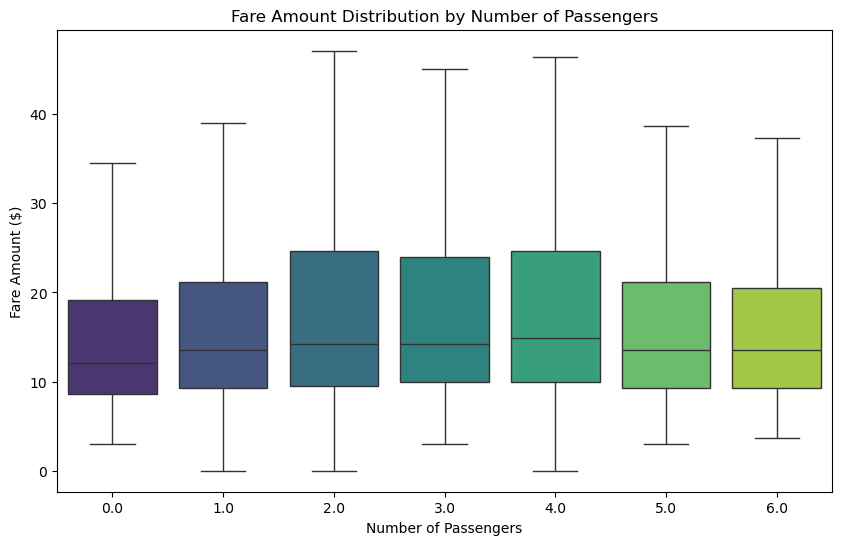

In [194]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x="passenger_count", y="fare_amount", data=non_zero_df , showfliers=False, palette="viridis")

# Labels & title
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount Distribution by Number of Passengers")
plt.show()


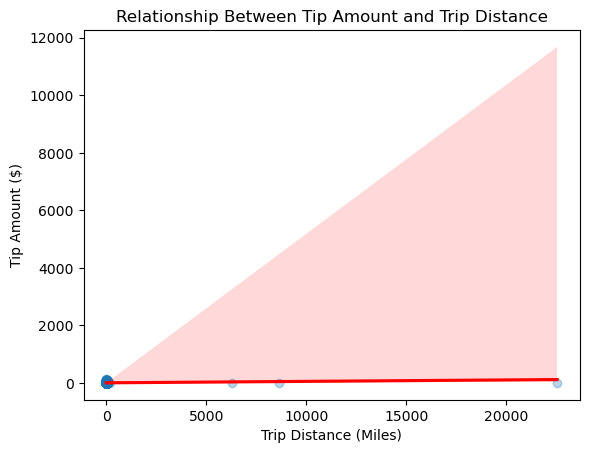

In [195]:
# Show relationship between tip and trip distance

# Scatter plot with regression line
sns.regplot(x="trip_distance", y="tip_amount", data=non_zero_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Trip Distance (Miles)")
plt.ylabel("Tip Amount ($)")
plt.title("Relationship Between Tip Amount and Trip Distance")
plt.show()



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    250693
2     51011
4      2013
3      1078
Name: count, dtype: int64


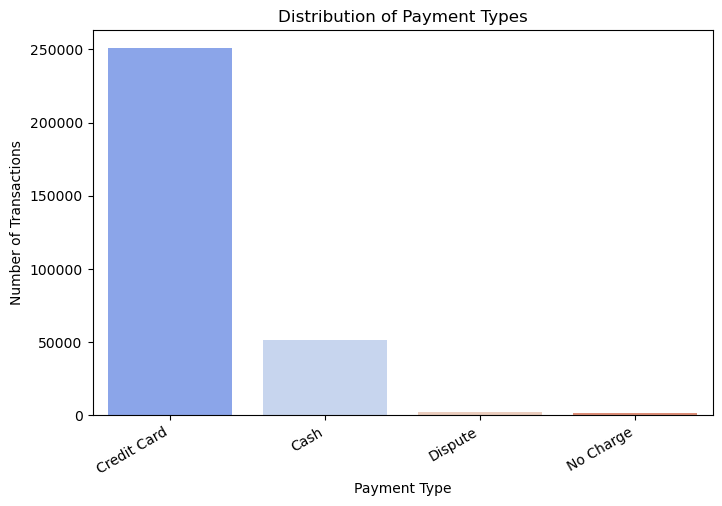

In [196]:
# Analyse the distribution of different payment types (payment_type).

payment_counts = non_zero_df["payment_type"].value_counts()
print(payment_counts)

payment_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}

payment_counts.index = payment_counts.index.map(payment_labels)

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="coolwarm")
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=30, ha="right")
plt.show()


In [197]:
non_zero_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304795 entries, 0 to 311002
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               304795 non-null  int64         
 1   tpep_pickup_datetime   304795 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  304795 non-null  datetime64[ns]
 3   passenger_count        304795 non-null  float64       
 4   trip_distance          304795 non-null  float64       
 5   RatecodeID             304795 non-null  float64       
 6   store_and_fwd_flag     304795 non-null  object        
 7   PULocationID           304795 non-null  int64         
 8   DOLocationID           304795 non-null  int64         
 9   payment_type           304795 non-null  int64         
 10  fare_amount            304795 non-null  float64       
 11  extra                  304795 non-null  float64       
 12  mta_tax                304795 non-null  float64  

In [198]:
non_zero_df.shape

(304795, 25)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [199]:
!pip install geopandas

In [200]:
# check geopandas version
import geopandas as gpd
print(gpd.__version__)

1.0.1


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [201]:
# import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("C:\\Users\\SATABDI\\Downloads\\EDA_NYC_Taxi_Records\\Datasets and Dictionary\\taxi_zones\\taxi_zones.shp") # read the .shp file using gpd

zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

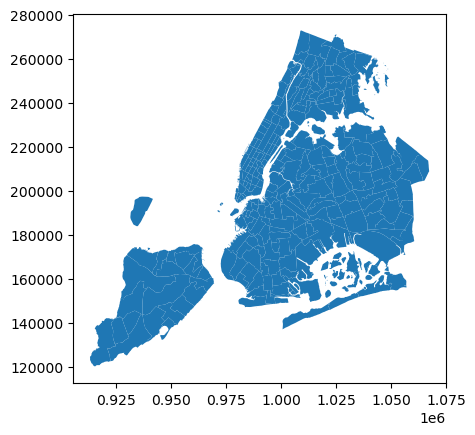

In [202]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [203]:
# Merge zones and trip records using locationID and PULocationID
merged_data = non_zero_df.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
print(merged_data.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         1.0                  N            66           107   

   payment_type  ...  pickup_month  pickup_quarter  trip_duration  OBJECTI

In [204]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304815 entries, 0 to 304814
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               304815 non-null  int64         
 1   tpep_pickup_datetime   304815 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  304815 non-null  datetime64[ns]
 3   passenger_count        304815 non-null  float64       
 4   trip_distance          304815 non-null  float64       
 5   RatecodeID             304815 non-null  float64       
 6   store_and_fwd_flag     304815 non-null  object        
 7   PULocationID           304815 non-null  int64         
 8   DOLocationID           304815 non-null  int64         
 9   payment_type           304815 non-null  int64         
 10  fare_amount            304815 non-null  float64       
 11  extra                  304815 non-null  float64       
 12  mta_tax                304815 non-null  floa

In [205]:
merged_data.shape

(304815, 32)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [206]:
# Group data by location and calculate the number of trips

trip_counts = merged_data.groupby("PULocationID").size().reset_index(name="trip_count")

trip_counts = trip_counts.sort_values(by="trip_count", ascending=False)
print(trip_counts.head(10))

     PULocationID  trip_count
116           132       15556
212           237       14355
144           161       14183
211           236       12909
145           162       10969
122           138       10396
165           186       10359
205           230       10081
126           142       10051
153           170        8977


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [207]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(trip_counts, left_on="LocationID", right_on="PULocationID", how="left")

zones["trip_count"] = zones["trip_count"].fillna(0)
print(zones.head())


   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  trip_count  
0           1.0         5.0  
1           NaN         0.0  
2           3.0         8.

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

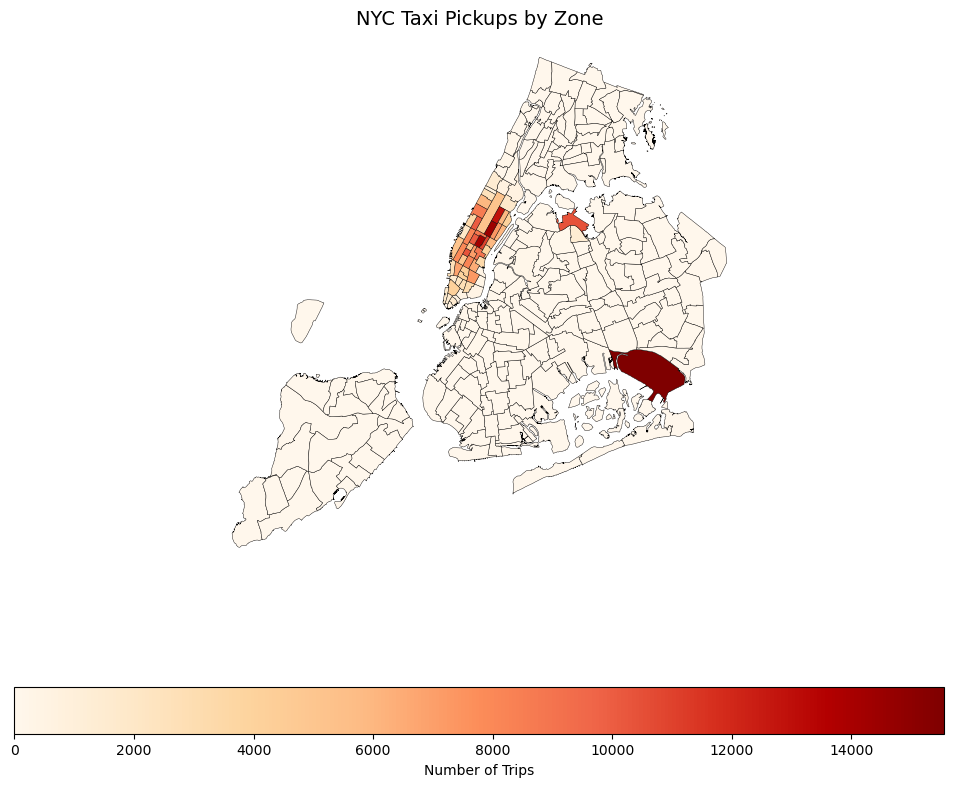

In [208]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(
    column="trip_count",
    ax=ax,
    cmap="OrRd",
    legend=True,
    legend_kwds={"label": "Number of Trips", "orientation": "horizontal"},
    edgecolor="black", 
    linewidth=0.3
)

ax.set_title("NYC Taxi Pickups by Zone", fontsize=14)

ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.show()


In [209]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by="trip_count", ascending=False)
print(zones_sorted.head(10)) # Display the top 10 zones with the highest number of trips


     OBJECTID  Shape_Leng  Shape_Area                          zone  \
131       132    0.245479    0.002038                   JFK Airport   
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
141       142    0.038176    0.000076           Lincoln Square East   
169       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236         237  Manhattan  POLYGON ((993633.442 216961.

In [210]:
zones_sorted[['zone', 'borough', 'trip_count']].head(10)

zone    borough  trip_count
131                   JFK Airport     Queens     15556.0
236         Upper East Side South  Manhattan     14355.0
160                Midtown Center  Manhattan     14183.0
235         Upper East Side North  Manhattan     12909.0
161                  Midtown East  Manhattan     10969.0
137             LaGuardia Airport     Queens     10396.0
185  Penn Station/Madison Sq West  Manhattan     10359.0
229     Times Sq/Theatre District  Manhattan     10081.0
141           Lincoln Square East  Manhattan     10051.0
169                   Murray Hill  Manhattan      8977.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [211]:
# Find routes which have the slowest speeds at different times of the day

# Calculate trip duration in hours
non_zero_df["trip_duration_hours"] = (non_zero_df["tpep_dropoff_datetime"] - non_zero_df["tpep_pickup_datetime"]).dt.total_seconds() / 3600

# Group by pickup hour and calculate average speed
speed_per_hour = non_zero_df.groupby("pickup_hour").apply(lambda x: (x["trip_distance"].sum() / x["trip_duration_hours"].sum()))

# Sort speeds to find the slowest hours
slowest_hours = speed_per_hour.sort_values(ascending=True)

# Find the slowest hour
slowest_hour = slowest_hours.idxmin()
slowest_speed = slowest_hours.min()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=slowest_hours.index, y=slowest_hours.values, palette="Reds_r")

# Highlight slowest hour
plt.axvline(x=slowest_hour, color='blue', linestyle='--', label=f'Slowest Hour: {slowest_hour} ({slowest_speed:.2f} mph)')

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Average Speed (mph)")
plt.title("Slowest Taxi Speeds at Different Hours of the Day")
plt.xticks(range(24))  # Show all hours
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [212]:
print(slowest_hours)
print()
print("slowest hour:", slowest_hour) 
print("slowest speed:", slowest_speed)

pickup_hour
17    10.253537
18    10.396988
16    10.450350
15    10.570985
13    10.666710
11    10.857495
12    11.011806
14    11.078730
10    11.372303
8     11.708137
19    12.112749
20    13.313015
21    13.800527
2     14.431641
0     14.990229
1     15.468874
3     15.511000
23    15.517257
22    15.996305
9     17.869553
7     18.365950
6     19.220695
4     20.172388
5     23.691918
dtype: float64

slowest hour: 17
slowest speed: 10.253537453825357


In [213]:
non_zero_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304795 entries, 0 to 311002
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               304795 non-null  int64         
 1   tpep_pickup_datetime   304795 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  304795 non-null  datetime64[ns]
 3   passenger_count        304795 non-null  float64       
 4   trip_distance          304795 non-null  float64       
 5   RatecodeID             304795 non-null  float64       
 6   store_and_fwd_flag     304795 non-null  object        
 7   PULocationID           304795 non-null  int64         
 8   DOLocationID           304795 non-null  int64         
 9   payment_type           304795 non-null  int64         
 10  fare_amount            304795 non-null  float64       
 11  extra                  304795 non-null  float64       
 12  mta_tax                304795 non-null  float64  

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

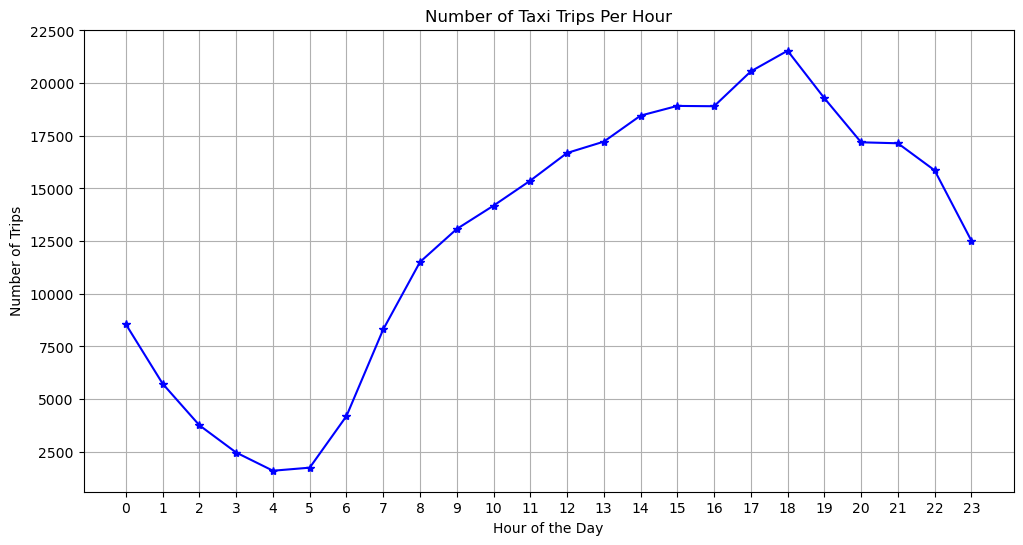

The busiest hour is 18:00 with 21538 trips.


In [214]:
# Visualise the number of trips per hour and find the busiest hour

trips_per_hour = non_zero_df.groupby("pickup_hour")["trip_distance"].count()

plt.figure(figsize=(12, 6))
plt.plot(trips_per_hour.index, trips_per_hour.values, marker="*", linestyle="-", color="b")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Taxi Trips Per Hour")
plt.xticks(range(0, 24))  
plt.grid()
plt.show()

busiest_hour = trips_per_hour.idxmax()
max_trips = trips_per_hour.max()

print(f"The busiest hour is {busiest_hour}:00 with {max_trips} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [215]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Scale up the trip counts
scaled_trip_counts = non_zero_df.groupby('pickup_hour')['VendorID'].count() / sample_fraction

# Convert to DataFrame for better visualization
scaled_trip_counts = scaled_trip_counts.reset_index()
scaled_trip_counts.columns = ['pickup_hour', 'scaled_trip_count']

# Display the top 5 busiest hours
scaled_trip_counts.sort_values(by='scaled_trip_count', ascending=False).head(5)



pickup_hour  scaled_trip_count
18           18           430760.0
17           17           411160.0
19           19           385720.0
15           15           378360.0
16           16           378060.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

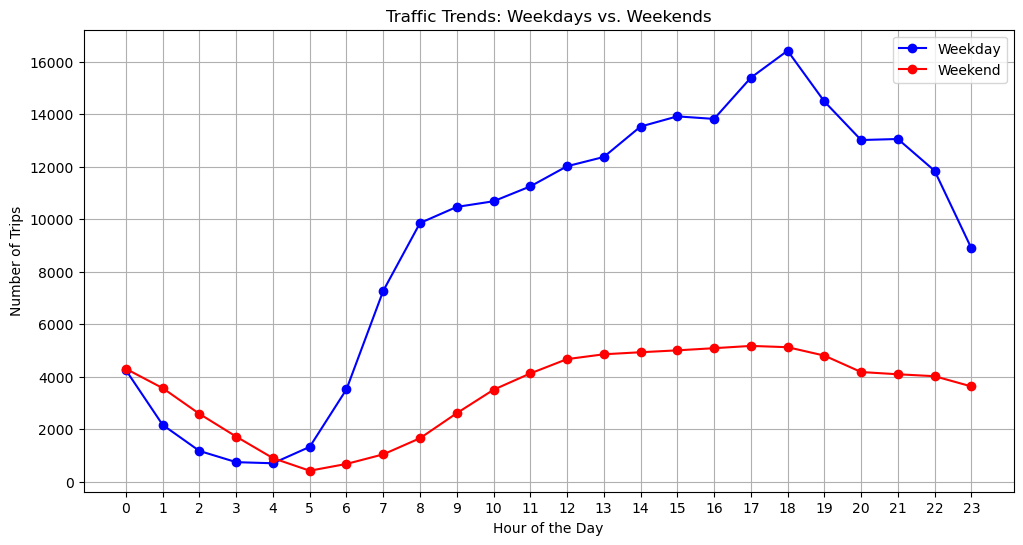

In [216]:
# Compare traffic trends for the week days and weekends

non_zero_df["pickup_day"] = non_zero_df["tpep_pickup_datetime"].dt.dayofweek
non_zero_df["is_weekend"] = non_zero_df["pickup_day"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

weekday_trips = non_zero_df[non_zero_df["is_weekend"] == "Weekday"].groupby(non_zero_df["tpep_pickup_datetime"].dt.hour).size()
weekend_trips = non_zero_df[non_zero_df["is_weekend"] == "Weekend"].groupby(non_zero_df["tpep_pickup_datetime"].dt.hour).size()

plt.figure(figsize=(12, 6))

plt.plot(weekday_trips.index, weekday_trips.values, marker="o", linestyle="-", label="Weekday", color="b")
plt.plot(weekend_trips.index, weekend_trips.values, marker="o", linestyle="-", label="Weekend", color="r")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Traffic Trends: Weekdays vs. Weekends")
plt.legend()
plt.xticks(range(0, 24))
plt.grid()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [217]:
# Find top 10 pickup and dropoff zones
top_pickups = non_zero_df["PULocationID"].value_counts().reset_index()
top_pickups.columns = ["PULocationID", "Number of Pickups"]

top_dropoffs = non_zero_df["DOLocationID"].value_counts().reset_index()
top_dropoffs.columns = ["DOLocationID", "Number of Dropoffs"]

top_pickups  = top_pickups.merge(zones,  left_on="PULocationID", right_on="LocationID", how="left")[["zone", "Number of Pickups"]]
top_dropoffs = top_dropoffs.merge(zones, left_on="DOLocationID", right_on="LocationID", how="left")[["zone", "Number of Dropoffs"]]

top_pickups.columns  = ["Pickup Zone", "Number of Pickups"]
top_dropoffs.columns = ["Dropoff Zone", "Number of Dropoffs"]

print("Top 10 Pickup Zones:")
print(top_pickups.head(10))

print("\nTop 10 Dropoff Zones:")
print(top_dropoffs.head(10))



Top 10 Pickup Zones:
                    Pickup Zone  Number of Pickups
0                   JFK Airport              15556
1         Upper East Side South              14355
2                Midtown Center              14183
3         Upper East Side North              12909
4                  Midtown East              10969
5             LaGuardia Airport              10396
6  Penn Station/Madison Sq West              10359
7     Times Sq/Theatre District              10081
8           Lincoln Square East              10051
9                   Murray Hill               8977

Top 10 Dropoff Zones:
                Dropoff Zone  Number of Dropoffs
0      Upper East Side North               13673
1      Upper East Side South               12836
2             Midtown Center               11990
3  Times Sq/Theatre District                9252
4                Murray Hill                9078
5               Midtown East                8714
6        Lincoln Square East                8677
7  

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [218]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = non_zero_df.groupby("PULocationID").size().rename("pickup_count")
dropoff_counts = non_zero_df.groupby("DOLocationID").size().rename("dropoff_count")

# Merge pickup and dropoff counts
zone_counts = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(1)  # Fill missing values with 1 to avoid division by zero

# Compute pickup/dropoff ratio
zone_counts["pickup_dropoff_ratio"] = zone_counts["pickup_count"] / zone_counts["dropoff_count"]

# Get top 10 zones with highest ratios
top_10_ratios = zone_counts.nlargest(10, "pickup_dropoff_ratio")

# Get bottom 10 zones with lowest ratios
bottom_10_ratios = zone_counts.nsmallest(10, "pickup_dropoff_ratio")

print("Top 10 Pickup/Dropoff Ratios:\n", top_10_ratios)
print("\nBottom 10 Pickup/Dropoff Ratios:\n", bottom_10_ratios)


Top 10 Pickup/Dropoff Ratios:
      pickup_count  dropoff_count  pickup_dropoff_ratio
70         1358.0            154              8.818182
132       15556.0           3396              4.580683
138       10396.0           3894              2.669748
186       10359.0           6811              1.520922
43         5157.0           3766              1.369357
249        6816.0           5005              1.361838
114        3962.0           2951              1.342596
162       10969.0           8714              1.258779
161       14183.0          11990              1.182902
100        4935.0           4179              1.180905

Bottom 10 Pickup/Dropoff Ratios:
      pickup_count  dropoff_count  pickup_dropoff_ratio
1             5.0            889              0.005624
257           4.0            137              0.029197
252           2.0             62              0.032258
192           1.0             30              0.033333
178           1.0             25              0.040000

In [219]:
top_10_ratios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 70 to 100
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pickup_count          10 non-null     float64
 1   dropoff_count         10 non-null     int64  
 2   pickup_dropoff_ratio  10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 320.0 bytes


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [220]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_trips = non_zero_df[(non_zero_df["pickup_hour"] >= 23) | (non_zero_df["pickup_hour"] <= 5)]

# Count pickups and dropoffs during night hours
night_pickup_counts  = night_trips.groupby("PULocationID").size().rename("night_pickup_count")
night_dropoff_counts = night_trips.groupby("DOLocationID").size().rename("night_dropoff_count")

# Merge pickup and dropoff counts
night_zone_counts = pd.concat([night_pickup_counts, night_dropoff_counts], axis=1).fillna(0)

# Get top 10 pickup zones at night
top_10_night_pickups = night_zone_counts.nlargest(10, "night_pickup_count")

# Get top 10 dropoff zones at night
top_10_night_dropoffs = night_zone_counts.nlargest(10, "night_dropoff_count")

print("Top 10 Pickup Zones at Night (11 PM - 5 AM):\n", top_10_night_pickups)
print("\nTop 10 Dropoff Zones at Night (11 PM - 5 AM):\n", top_10_night_dropoffs)


Top 10 Pickup Zones at Night (11 PM - 5 AM):
      night_pickup_count  night_dropoff_count
79               2635.0               1401.0
132              2371.0                344.0
249              2142.0                778.0
48               1716.0               1196.0
148              1643.0                734.0
114              1409.0                412.0
230              1403.0                739.0
186              1166.0                643.0
164              1030.0                654.0
138              1018.0                392.0

Top 10 Dropoff Zones at Night (11 PM - 5 AM):
      night_pickup_count  night_dropoff_count
79               2635.0               1401.0
48               1716.0               1196.0
170               661.0               1039.0
68                999.0                974.0
107               975.0                970.0
141               582.0                904.0
263               590.0                864.0
249              2142.0                778.0
236   

In [221]:
night_zone_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 3 to 259
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   night_pickup_count   241 non-null    float64
 1   night_dropoff_count  241 non-null    float64
dtypes: float64(2)
memory usage: 5.6 KB


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [222]:
# Filter for night hours (11 PM to 5 AM)

night_trips = non_zero_df[(non_zero_df["pickup_hour"] >= 23) | (non_zero_df["pickup_hour"] <= 5)]

print(night_trips.info())

night_trips.head()


data_df = night_trips.copy();

data_df['pickup_hour'] = data_df['tpep_pickup_datetime'].dt.hour

daytime_hours = range(6, 18)
nighttime_hours = list(range(18, 24)) + list(range(0, 6))

daytime_df = data_df[df['pickup_hour'].isin(daytime_hours)]
nighttime_df = data_df[data_df['pickup_hour'].isin(nighttime_hours)]
total_revenue = data_df['total_amount'].sum()

daytime_revenue_share = daytime_df['total_amount'].sum() / total_revenue * 100
nighttime_revenue_share = nighttime_df['total_amount'].sum() / total_revenue * 100

daytime_revenue_share, nighttime_revenue_share


<class 'pandas.core.frame.DataFrame'>
Index: 36376 entries, 0 to 311002
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               36376 non-null  int64         
 1   tpep_pickup_datetime   36376 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  36376 non-null  datetime64[ns]
 3   passenger_count        36376 non-null  float64       
 4   trip_distance          36376 non-null  float64       
 5   RatecodeID             36376 non-null  float64       
 6   store_and_fwd_flag     36376 non-null  object        
 7   PULocationID           36376 non-null  int64         
 8   DOLocationID           36376 non-null  int64         
 9   payment_type           36376 non-null  int64         
 10  fare_amount            36376 non-null  float64       
 11  extra                  36376 non-null  float64       
 12  mta_tax                36376 non-null  float64       
 13  tip_a

(0.0, 100.0)

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [223]:
# Analyse the fare per mile per passenger for different passenger counts

valid_trips = non_zero_df[(non_zero_df["trip_distance"] > 0) & (non_zero_df["passenger_count"] > 0)]

valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

valid_trips["fare_per_mile_per_passenger"] = valid_trips["fare_per_mile"] / valid_trips["passenger_count"]

fare_per_mile_per_passenger = valid_trips.groupby("passenger_count")["fare_per_mile_per_passenger"].mean().reset_index()  # fare per mile per passenger (for different passenger counts)
print(fare_per_mile_per_passenger)

print()
fare_analysis = valid_trips.groupby("passenger_count")["fare_per_mile_per_passenger"].agg(["mean", "median", "std", "count"]).reset_index()
print(fare_analysis)


plt.figure(figsize=(8, 5))
sns.barplot(data=fare_analysis, x="passenger_count", y="mean", palette="viridis")

plt.xlabel("Number of Passengers")
plt.ylabel("Avg Fare per Mile per Passenger (USD)")
plt.title("Fare per Mile per Passenger Across Different Passenger Counts")
plt.show()


   passenger_count  fare_per_mile_per_passenger
0              1.0                    11.682687
1              2.0                     6.258629
2              3.0                     4.176402
3              4.0                     5.236859
4              5.0                     1.581292
5              6.0                     1.276112

   passenger_count       mean    median         std   count
0              1.0  11.682687  7.153846  442.239998  231687
1              2.0   6.258629  3.497942   80.032897   44773
2              3.0   4.176402  2.368421   63.563364   11117
3              4.0   5.236859  1.782178   79.757266    6102
4              5.0   1.581292  1.419847    1.767276    3857
5              6.0   1.276112  1.194444    0.514694    2615


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [224]:
# Compare the average fare per mile for different days and for different times of the day

# Remove trips with zero distance
valid_trips = non_zero_df[non_zero_df["trip_distance"] > 0]

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Ensure 'pickup_day_name' is in valid_trips
valid_trips['pickup_day_name'] = valid_trips['tpep_pickup_datetime'].dt.day_name()

# Group by day of the week
fare_by_day = valid_trips.groupby("pickup_day_name")["fare_per_mile"].agg(["mean", "median", "std"]).reset_index()

# Group by pickup hour
fare_by_hour = valid_trips.groupby("pickup_hour")["fare_per_mile"].agg(["mean", "median", "std"]).reset_index()

# Display results
print(fare_by_day)
print()
print(fare_by_hour)


plt.figure(figsize=(10, 5))
sns.barplot(data=fare_by_day, x="pickup_day_name", y="mean", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="viridis")

plt.xlabel("Day of the Week")
plt.ylabel("Avg Fare per Mile (USD)")
plt.title("Average Fare per Mile for Each Day of the Week")
plt.xticks(rotation=45)
plt.show()


  pickup_day_name       mean    median         std
0          Friday  10.062772  7.222222   91.306010
1          Monday  10.435889  6.888889  116.328435
2        Saturday  11.130234  7.032967  141.996406
3          Sunday  12.025801  6.481638  178.631639
4        Thursday  12.481947  7.436436  156.207998
5         Tuesday  15.626375  7.380952  981.825375
6       Wednesday  11.338424  7.428571  121.371570

    pickup_hour       mean    median          std
0             0  11.442924  5.964108   159.264725
1             1  14.187003  5.984848   273.143869
2             2   9.153842  5.821429    61.421295
3             3  10.258101  5.671642    93.372960
4             4  17.375480  5.172414   300.008556
5             5  11.124523  5.063064    95.515499
6             6  12.365036  5.658808   225.235188
7             7   8.427208  6.500000    79.493789
8             8   9.575903  7.191011    82.890089
9             9  10.407298  7.373134   101.438550
10           10  24.645695  7.555556  171

In [225]:
valid_trips.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'pickup_day_of_week', 'pickup_month_name', 'pickup_month',
       'pickup_quarter', 'trip_duration', 'trip_duration_hours', 'pickup_day',
       'is_weekend', 'fare_per_mile', 'pickup_day_name'],
      dtype='object')

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

[2 1 6]
   VendorID       mean    median         std
0         1  10.614617  7.153846  726.247060
1         2  12.346800  7.128713  158.444740
2         6   5.442423  4.114431    4.281455


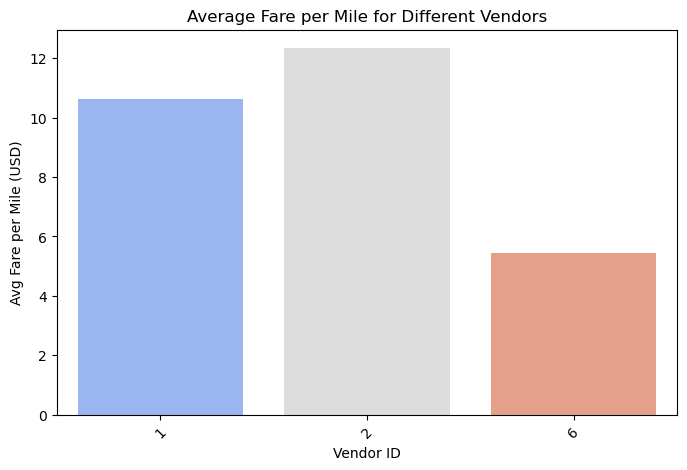

In [226]:
# Compare fare per mile for different vendors

# calculate unique values of VendorID
print(valid_trips['VendorID'].unique())

valid_trips = non_zero_df[non_zero_df["trip_distance"] > 0]

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Group by VendorID
fare_by_vendor = valid_trips.groupby("VendorID")["fare_per_mile"].agg(["mean", "median", "std"]).reset_index()

print(fare_by_vendor)


# Plot the graph
plt.figure(figsize=(8, 5))
sns.barplot(data=fare_by_vendor, x="VendorID", y="mean", palette="coolwarm")

plt.xlabel("Vendor ID")
plt.ylabel("Avg Fare per Mile (USD)")
plt.title("Average Fare per Mile for Different Vendors")
plt.xticks(rotation=45)
plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Average Fare Per Mile by Vendor and Distance Tier:
   VendorID distance_tier  fare_per_mile
0         1     0-2 miles      14.204320
1         1     2-5 miles       6.382038
2         1      5+ miles       4.417235
3         2     0-2 miles      18.004219
4         2     2-5 miles       6.532941
5         2      5+ miles       4.487987
6         6     0-2 miles      26.912698
7         6     2-5 miles       7.286363
8         6      5+ miles       4.214566


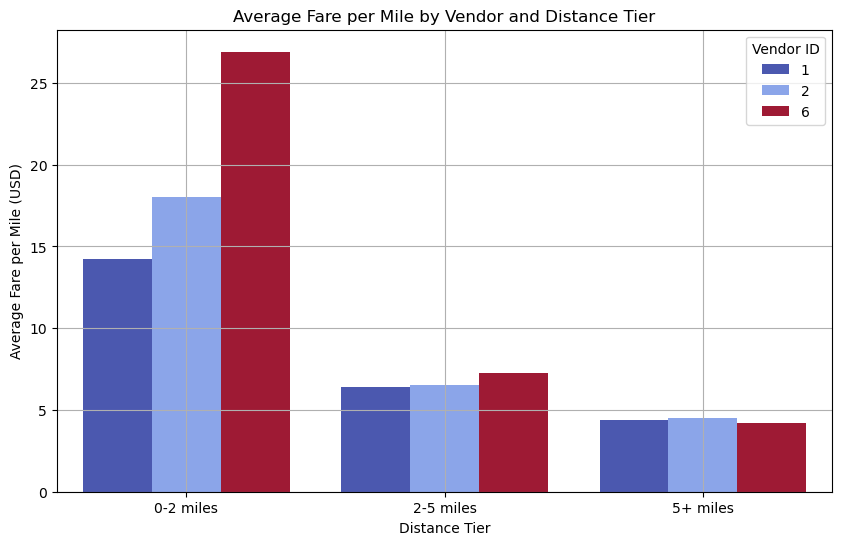

In [227]:
# Defining distance tiers

def categorize_distance(distance):
    if distance <= 2:
        return "0-2 miles"
    elif 2 < distance <= 5:
        return "2-5 miles"
    else:
        return "5+ miles"

valid_trips = non_zero_df[non_zero_df["trip_distance"] > 0]

valid_trips["distance_tier"] = valid_trips["trip_distance"].apply(categorize_distance)

valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

fare_per_mile_by_tier = valid_trips.groupby(["VendorID", "distance_tier"])["fare_per_mile"].mean().reset_index()

print("Average Fare Per Mile by Vendor and Distance Tier:")
print(fare_per_mile_by_tier)

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(data=fare_per_mile_by_tier, x="distance_tier", y="fare_per_mile", hue="VendorID", palette="coolwarm")
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile by Vendor and Distance Tier")
plt.legend(title="Vendor ID")
plt.grid(True)
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'pickup_day_of_week', 'pickup_month_name', 'pickup_month',
       'pickup_quarter', 'trip_duration', 'trip_duration_hours', 'pickup_day',
       'is_weekend', 'distance_tier', 'fare_per_mile'],
      dtype='object')

Average Tip Percentage by Distance:
  distance_in_miles  tip_percentage
0         0-2 miles       22.426239
1         2-5 miles       18.605704
2          5+ miles       16.483009

Average Tip Percentage by Passenger Count:
   passenger_count  tip_percentage
0              0.0       20.489232
1              1.0       20.580697
2              2.0       19.736148
3              3.0       18.932052


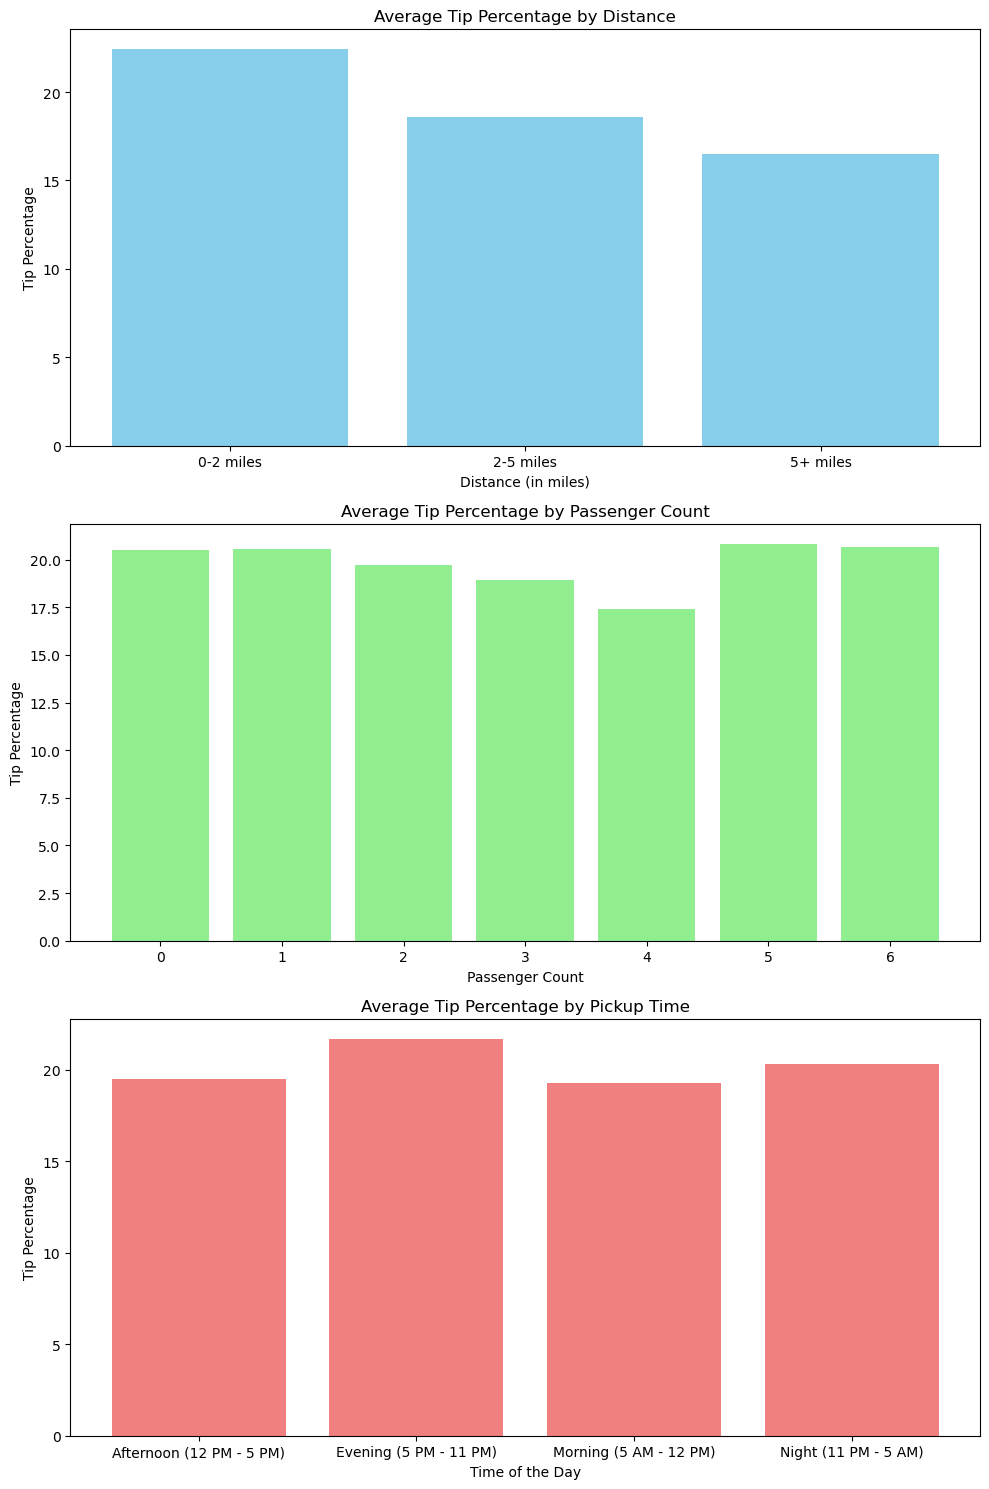

In [228]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

print()
print(valid_trips.columns)
print()

valid_trips = non_zero_df[non_zero_df["trip_distance"] > 0]
# print()
# print(valid_trips.columns)

valid_trips = non_zero_df[non_zero_df["fare_amount"] > 0].copy()
# print()
# print(valid_trips.columns)

valid_trips["tip_percentage"] = (valid_trips["tip_amount"] / valid_trips["fare_amount"]) * 100
# print()
# print(valid_trips.columns)

# print(valid_trips.tip_percentage.head(5))


def categorize_distance(distance):
    if distance <= 2:
        return "0-2 miles"
    elif 2 < distance <= 5:
        return "2-5 miles"
    else:
        return "5+ miles"

valid_trips["distance_in_miles"] = valid_trips["trip_distance"].apply(categorize_distance) 

def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning (5 AM - 12 PM)"
    elif 12 <= hour < 17:
        return "Afternoon (12 PM - 5 PM)"
    elif 17 <= hour < 23:
        return "Evening (5 PM - 11 PM)"
    else:
        return "Night (11 PM - 5 AM)"

valid_trips["time_of_the_day"] = valid_trips["pickup_hour"].apply(categorize_time)

tip_by_distance  = valid_trips.groupby("distance_in_miles")["tip_percentage"].mean().reset_index()
tip_by_passenger = valid_trips.groupby("passenger_count")["tip_percentage"].mean().reset_index()
tip_by_time      = valid_trips.groupby("time_of_the_day")["tip_percentage"].mean().reset_index()


print("Average Tip Percentage by Distance:")
print(tip_by_distance)
print()
print("Average Tip Percentage by Passenger Count:")
print(tip_by_passenger)
print()
print("Average Tip Percentage by Pickup Time:")
print(tip_by_time)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Tip Percentage by Distance
axs[0].bar(tip_by_distance["distance_in_miles"], tip_by_distance["tip_percentage"], color='skyblue')
axs[0].set_title("Average Tip Percentage by Distance")
axs[0].set_xlabel("Distance (in miles)")
axs[0].set_ylabel("Tip Percentage")

# Tip Percentage by Passenger Count
axs[1].bar(tip_by_passenger["passenger_count"], tip_by_passenger["tip_percentage"], color='lightgreen')
axs[1].set_title("Average Tip Percentage by Passenger Count")
axs[1].set_xlabel("Passenger Count")
axs[1].set_ylabel("Tip Percentage")

# Tip Percentage by Pickup Time
axs[2].bar(tip_by_time["time_of_the_day"], tip_by_time["tip_percentage"], color='lightcoral')
axs[2].set_title("Average Tip Percentage by Pickup Time")
axs[2].set_xlabel("Time of the Day")
axs[2].set_ylabel("Tip Percentage")

plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'pickup_day_of_week', 'pickup_month_name', 'pickup_month',
       'pickup_quarter', 'trip_duration', 'trip_duration_hours', 'pickup_day',
       'is_weekend', 'tip_percentage', 'distance_in_miles', 'time_of_the_day'],
      dtype='object')


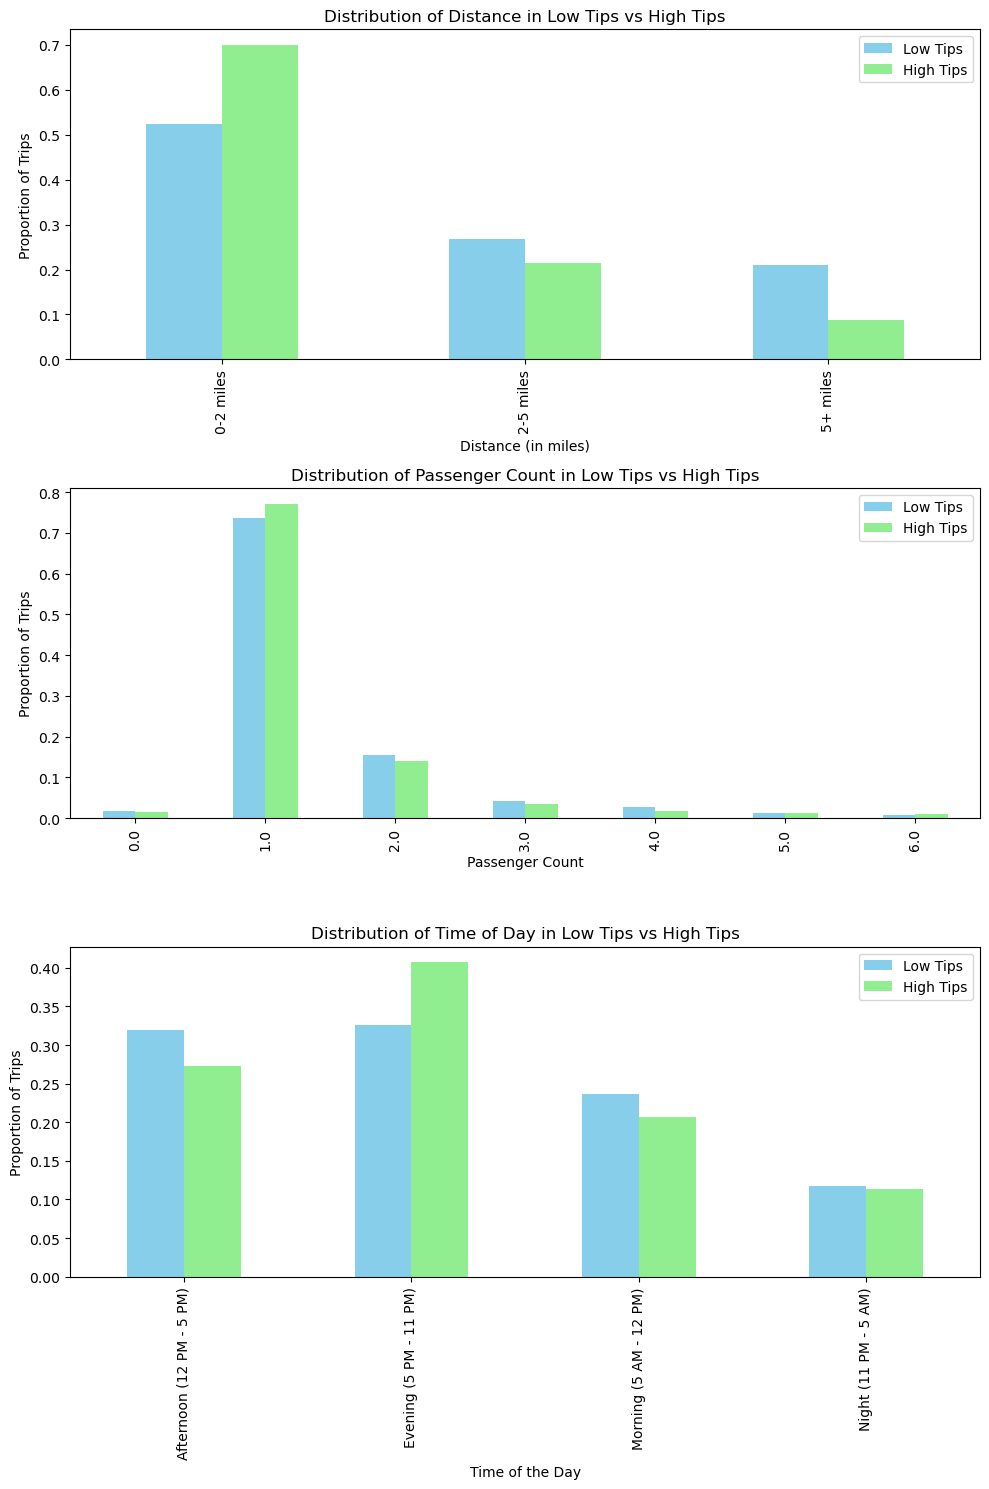

In [229]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
print(valid_trips.columns)

# Define low tips and high tips
low_tips  = valid_trips[valid_trips["tip_percentage"] < 10]
high_tips = valid_trips[valid_trips["tip_percentage"] > 25]

# Compare distribution of distance
distance_comparison = pd.DataFrame({
    "Low Tips":  low_tips["distance_in_miles"].value_counts(normalize=True),
    "High Tips": high_tips["distance_in_miles"].value_counts(normalize=True)
}).sort_index()

# Compare distribution of passenger count
passenger_comparison = pd.DataFrame({
    "Low Tips":  low_tips["passenger_count"].value_counts(normalize=True),
    "High Tips": high_tips["passenger_count"].value_counts(normalize=True)
}).sort_index()

# Compare distribution of time of day
time_comparison = pd.DataFrame({
    "Low Tips":  low_tips["time_of_the_day"].value_counts(normalize=True),
    "High Tips": high_tips["time_of_the_day"].value_counts(normalize=True)
}).sort_index()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Distance Comparison
distance_comparison.plot(kind='bar', ax=axs[0], color=['skyblue', 'lightgreen'])
axs[0].set_title("Distribution of Distance in Low Tips vs High Tips")
axs[0].set_xlabel("Distance (in miles)")
axs[0].set_ylabel("Proportion of Trips")

# Passenger Count Comparison
passenger_comparison.plot(kind='bar', ax=axs[1], color=['skyblue', 'lightgreen'])
axs[1].set_title("Distribution of Passenger Count in Low Tips vs High Tips")
axs[1].set_xlabel("Passenger Count")
axs[1].set_ylabel("Proportion of Trips")

# Time of the Day Comparison
time_comparison.plot(kind='bar', ax=axs[2], color=['skyblue', 'lightgreen'])
axs[2].set_title("Distribution of Time of Day in Low Tips vs High Tips")
axs[2].set_xlabel("Time of the Day")
axs[2].set_ylabel("Proportion of Trips")

plt.tight_layout()
plt.show()



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [230]:
# See how passenger count varies across hours and days

print(valid_trips.columns) 

passenger_by_hour = valid_trips.groupby("pickup_hour")["passenger_count"].mean().reset_index()
passenger_by_day  = valid_trips.groupby("pickup_day_of_week")["passenger_count"].mean().reset_index()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Average Passenger Count by Hour
axs[0].plot(passenger_by_hour["pickup_hour"], passenger_by_hour["passenger_count"], marker='o', linestyle='-')
axs[0].set_title("Average Passenger Count by Hour of the Day")
axs[0].set_xlabel("Hour of the Day")
axs[0].set_ylabel("Average Passenger Count")
axs[0].grid(True)

# Average Passenger Count by Day of the Week
axs[1].plot(passenger_by_day["pickup_day_of_week"], passenger_by_day["passenger_count"], marker='*', color='skyblue')
axs[1].set_title("Average Passenger Count by Day of the Week")
axs[1].set_xlabel("Day of the Week")
axs[1].set_ylabel("Average Passenger Count")

plt.tight_layout()
plt.show()


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'pickup_day_of_week', 'pickup_month_name', 'pickup_month',
       'pickup_quarter', 'trip_duration', 'trip_duration_hours', 'pickup_day',
       'is_weekend', 'tip_percentage', 'distance_in_miles', 'time_of_the_day'],
      dtype='object')


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [231]:
# How does passenger count vary across zones

# Calculate average passenger count for each pickup zone
passenger_by_pu_zone = valid_trips.groupby("PULocationID")["passenger_count"].mean().reset_index()

# Calculate average passenger count for each dropoff zone
passenger_by_do_zone = valid_trips.groupby("DOLocationID")["passenger_count"].mean().reset_index()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Average Passenger Count by Pickup Zone
axs[0].bar(passenger_by_pu_zone["PULocationID"], passenger_by_pu_zone["passenger_count"], color='skyblue')
axs[0].set_title("Average Passenger Count by Pickup Zone")
axs[0].set_xlabel("Pickup Zone ID")
axs[0].set_ylabel("Average Passenger Count")

# Average Passenger Count by Dropoff Zone
axs[1].bar(passenger_by_do_zone["DOLocationID"], passenger_by_do_zone["passenger_count"], color='lightgreen')
axs[1].set_title("Average Passenger Count by Dropoff Zone")
axs[1].set_xlabel("Dropoff Zone ID")
axs[1].set_ylabel("Average Passenger Count")

plt.tight_layout()
plt.show()


In [232]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.





Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [233]:
# How often is each surcharge applied?

# surcharges columns:
surcharge_columns = ['extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']

# frequency of each surcharge
surcharge_frequency = valid_trips[surcharge_columns].apply(lambda x: (x > 0).mean()).reset_index()
surcharge_frequency.columns = ['Surcharge', 'Frequency']

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(surcharge_frequency['Surcharge'], surcharge_frequency['Frequency'], color='skyblue')
plt.title("Frequency of Each Surcharge")
plt.xlabel("Surcharge")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [234]:
# 1. The busiest hours for taxi pickups are between 6 PM and 8 PM, and the slowest speeds are between 2 AM and 3 AM. 
#    To optimize routing and dispatching, consider increasing the number of drivers during peak hours and reducing the number of drivers during slow hours.
# 2. Focus on these top high-demand areas to maximize revenue and customer satisfaction.
# 3. Analyze the average fare per mile for different vendors to identify operational inefficiencies and optimize pricing strategies.
# 4. Consider offering discounts or promotions during off-peak hours to increase demand and revenue.
# 5. Analyze the distribution of passenger counts across different hours and days to optimize vehicle availabilitty and reduce operational costs.
# 6. Investigate the distribution of surcharges to identify patterns and trends that can help optimize pricing strategies and increase revenue.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [235]:
# 1. Position cabs in high-demand zones during peak hours to maximize revenue and customer satisfaction.
# 2. Analyze the distribution of passenger counts across different zones to optimize vehicle capacity and reduce operational costs.
# 3. Use the insights from the analysis to optimize routing and dispatching, and improve overall operational efficiency.
# 4. Identify high-traffic areas and strategically position cabs to minimize wait times and increase customer satisfaction.
# 5. Monitor trends in surcharge applications to identify patterns and optimize pricing strategies for different zones.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [236]:
# Analyze the distribution of passenger counts across different zones to optimize vehicle capacity and reduce operational costs.
# Identify top high-demand zones and strategically position cabs to maximize revenue and customer satisfaction.
# Monitor trends in surcharge applications to identify patterns and optimize pricing strategies for different zones.
# Use the insights from the analysis to optimize routing and dispatching, and improve overall operational efficiency.
# Consider offering discounts or promotions in low-demand zones to increase demand and revenue. 